# Pymaceuticals Inc.
---

### Analysis

- Based on the boxplots of Capomulin, Ramicane, Infubinol, and Ceftamin, Ramicane best reduced the tumor volume followed closely by Capomulin
- Capomulin and Ramicane has the most timepoint observation of tumor volume, that makes them the most observed treatment
- Under Capomulin treatments, the mice weight and tumor volume have a high positive correlation. That means mouse tumor volume is higher when mouse weight is higher
- The gender of the mice tested are almost equal in count, but since the count is not on a per treatment, it lacks merit to say that the study result is gender neutral

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata)

# Display the data table for preview
df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_metadata['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
df_groupby_midtp = df.groupby(['Mouse ID', 'Timepoint'])

midtp = df_groupby_midtp.filter(lambda x: x['Mouse ID'].count() > 1)['Mouse ID'].unique()
midtp

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
df.loc[df['Mouse ID'] == midtp[0]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
tmp_df = df.loc[(df['Mouse ID'] == midtp[0])] 
df = df.drop(tmp_df.index)
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
df_groupby_regimen = df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby(['Drug Regimen'])
df_summarystats = df_groupby_regimen.mean()
df_summarystats.rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume'}, inplace=True)
df_summarystats['Median Tumor Volume'] = df_groupby_regimen.median()
df_summarystats['Tumor Volume Variance'] = df_groupby_regimen.var()
df_summarystats['Tumor Volume Std. Dev.'] = df_groupby_regimen.std()
df_summarystats['Tumor Volume Std. Err.'] = df_groupby_regimen.sem()

df_summarystats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tmp_df = df_groupby_regimen.describe(percentiles=[.5])

tmp_df.drop(columns=['count', 'min', 'max'], level=1, inplace=True)
tmp_df.rename(columns={'50%':'median'}, inplace=True)
# tmp_df['Tumor Volume (mm3)']['var'] = tmp_df['Tumor Volume (mm3)']['std']**2
# tmp_df.loc[:, ['Tumor Volume (mm3)']['var']] = tmp_df['Tumor Volume (mm3)']['std']**2
tmp_df = tmp_df['Tumor Volume (mm3)'].assign(var = tmp_df['Tumor Volume (mm3)']['std']**2)
tmp_df[['mean', 'median', 'var', 'std']]


,mean,median,var,std
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.320930,50.446266,43.852013,6.622085
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


## Bar and Pie Charts

In [9]:
%matplotlib widget

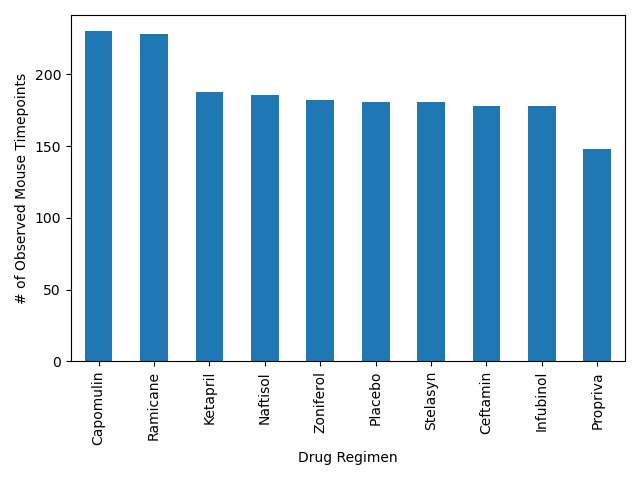

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plt.close('all')
tpcount_per_regimen_df = df_groupby_regimen.count()
tpcount_per_regimen_df = tpcount_per_regimen_df.sort_values('Tumor Volume (mm3)', ascending=False)

tpcount_per_regimen_df.plot(kind="bar", legend=False)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()


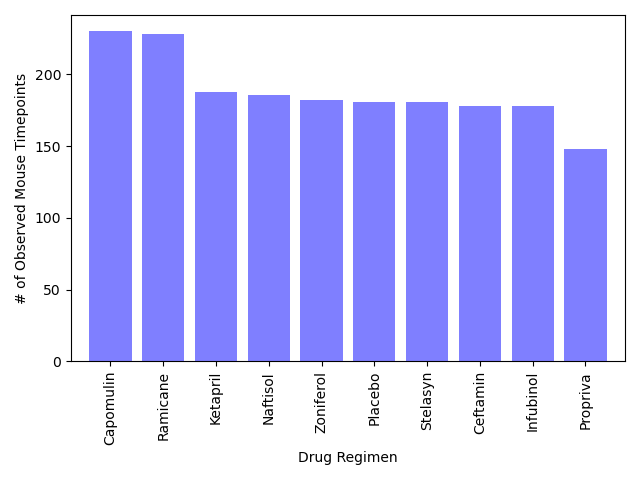

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
number_of_tp_per_regimen = df_groupby_regimen.count()
y_values = number_of_tp_per_regimen.sort_values('Tumor Volume (mm3)', ascending=False)
x_axis = np.arange(len(number_of_tp_per_regimen))

plt.close('all')
plt.bar(x_axis, y_values['Tumor Volume (mm3)'], color='b', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, y_values.index, rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
# plt.ylim(0, max(y_values)+5000)
plt.xlim(-0.75, len(x_axis)-0.25)

plt.tight_layout()
plt.show()

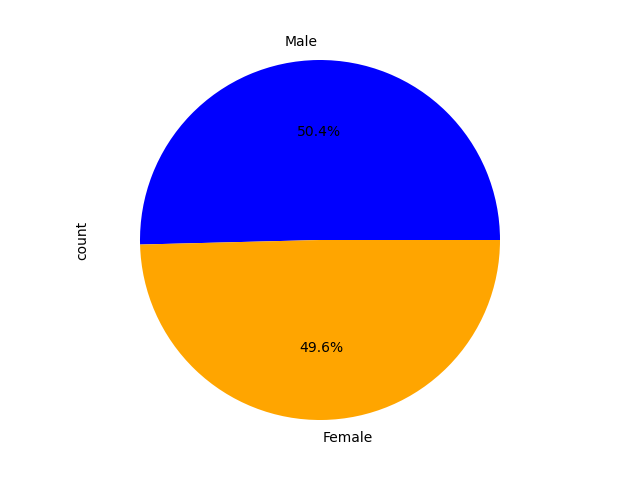

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mids_df = df[['Mouse ID', 'Sex']]
mids_df = mids_df.drop_duplicates()

males_count = mids_df.loc[ mids_df['Sex'] == 'Male', 'Mouse ID' ].count()
females_count = mids_df.loc[ mids_df['Sex'] == 'Female', 'Mouse ID' ].count()
mids_df = pd.DataFrame({'count': [males_count, females_count]}, index=['Male', 'Female'])

labels = ['Male', 'Female']
colors = ['blue', 'orange']

# Make the pie chart
plt.close('all')
mids_df.plot(kind='pie', y='count', labels=labels, colors=colors, autopct="%1.1f%%", legend=False)
plt.ylabel('count')

plt.tight_layout()
plt.show()


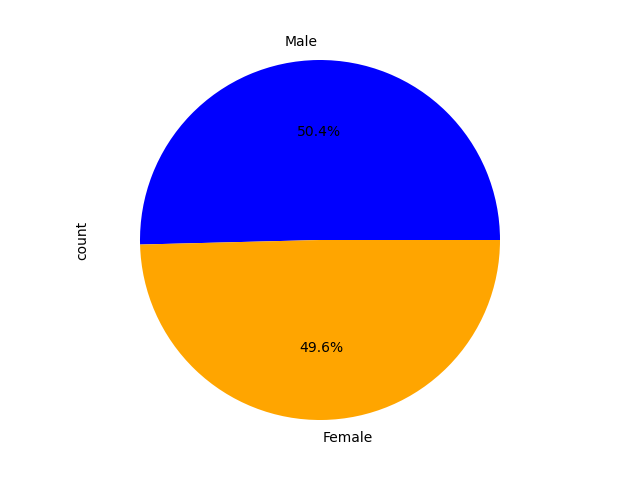

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mids_df = df[['Mouse ID', 'Sex']]
mids_df = mids_df.drop_duplicates()

males_count = mids_df.loc[ mids_df['Sex'] == 'Male', 'Mouse ID' ].count()
females_count = mids_df.loc[ mids_df['Sex'] == 'Female', 'Mouse ID' ].count()

sizes = [males_count, females_count]
labels = ['Male', 'Female']
colors = ['blue', 'orange']

# Make the pie chart
plt.close('all')
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.ylabel('count')

plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_grp = df.groupby(['Mouse ID'])
mousemaxtp_ser = mouse_grp['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mousemaxtp_df = pd.merge(df, mousemaxtp_ser, on=['Mouse ID', 'Timepoint'])


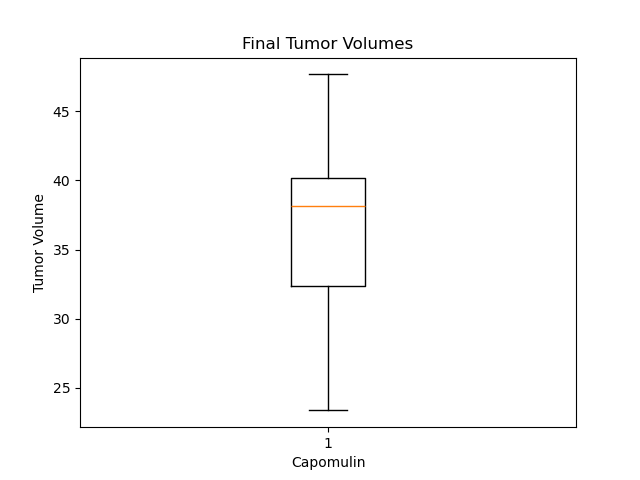

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


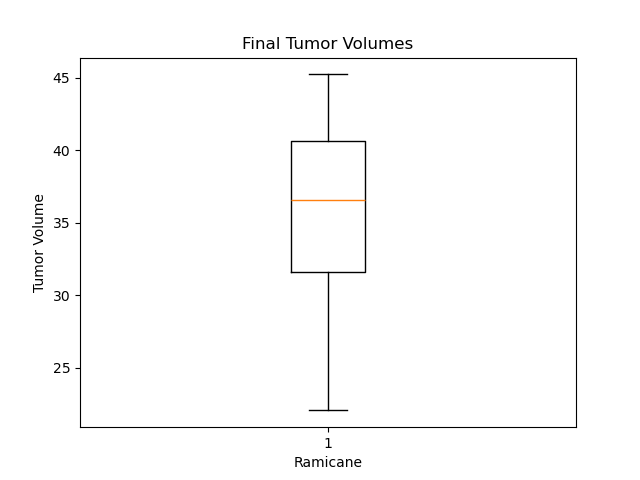

Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


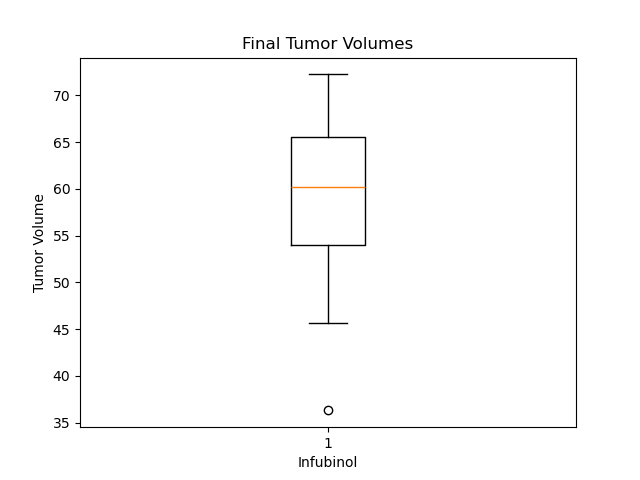

Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Outlier: 
   Mouse ID Drug Regimen  Tumor Volume (mm3)
20     c326    Infubinol           36.321346


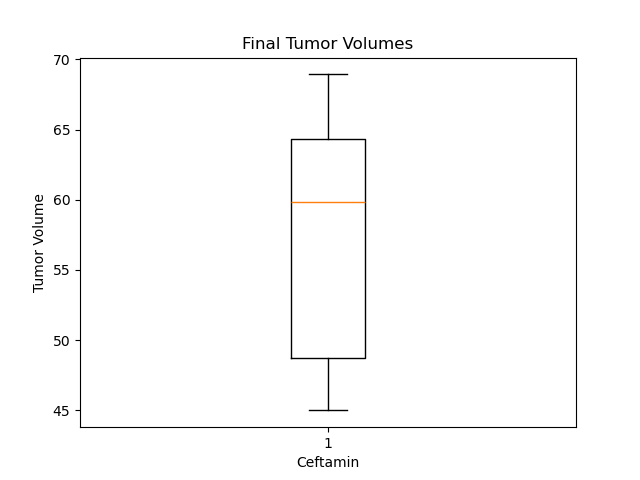

Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
plt.close('all')
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

for treatment in regimen_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    finaltumorvol_ser = mousemaxtp_df.loc[mousemaxtp_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

    # add subset
    fig1, ax1 = plt.subplots()
    ax1.set_title('Final Tumor Volumes')
    ax1.set_xlabel(treatment)
    ax1.set_ylabel('Tumor Volume')
    ax1.boxplot(finaltumorvol_ser)
    plt.show()

    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = finaltumorvol_ser.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    # Determine outliers using upper and lower bounds
    tumorvol_outlier = mousemaxtp_df.loc[(mousemaxtp_df['Drug Regimen'] == treatment) & 
                                         ((mousemaxtp_df['Tumor Volume (mm3)'] < lower_bound) | 
                                          (mousemaxtp_df['Tumor Volume (mm3)'] > upper_bound)
                                         )
                                        ][['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
    
    if (tumorvol_outlier.empty == False):
        print('Outlier: ')
        print(tumorvol_outlier)



In [ ]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

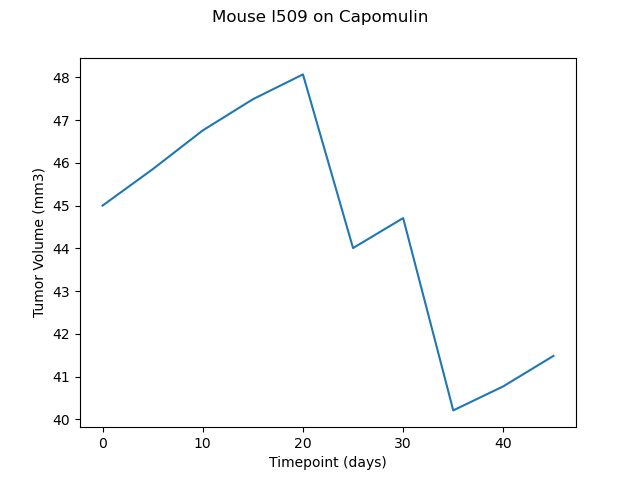

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
treatment = 'Capomulin' #df.loc[df['Mouse ID'] == 's185', 'Drug Regimen'].unique()
timepoint_ser = df.loc[df['Mouse ID'] == mouse_id, 'Timepoint']
tumorvol_ser  = df.loc[df['Mouse ID'] == mouse_id, 'Tumor Volume (mm3)']

plt.close('all')
plt.suptitle(f"Mouse {mouse_id} on {treatment}")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(timepoint_ser, tumorvol_ser)
plt.show()

<Axes: xlabel='Average Tumor Volume (mm3)', ylabel='Weight (g)'>

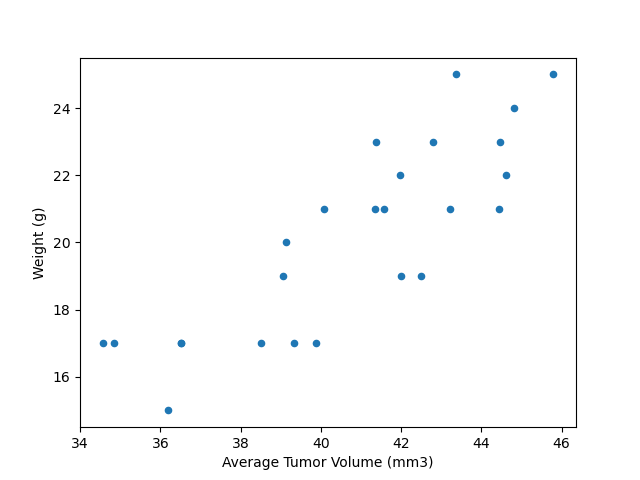

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_df = df.loc[df['Drug Regimen'] == 'Capomulin', ['Mouse ID', 'Tumor Volume (mm3)', 'Weight (g)']]
grouped_mouseid_df = Capomulin_df.groupby(['Mouse ID']).mean()
grouped_mouseid_df.rename(columns={'Tumor Volume (mm3)':'Average Tumor Volume (mm3)'}, inplace=True, errors='raise')

plt.close('all')
grouped_mouseid_df.plot(kind='scatter', x='Average Tumor Volume (mm3)', y='Weight (g)')


## Correlation and Regression

The correlation between mouse weight and average observed tumor volume is 0.84


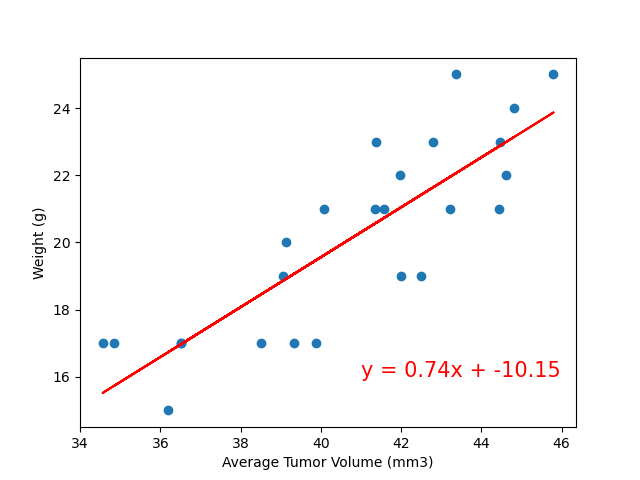

In [25]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
ave_tumor_vol = grouped_mouseid_df['Average Tumor Volume (mm3)']
weight = grouped_mouseid_df['Weight (g)']
correlation = st.pearsonr(ave_tumor_vol, weight)
print(f"The correlation between mouse weight and average observed tumor volume is {round(correlation[0],2)}")

plt.close('all')
x_values = ave_tumor_vol
y_values = weight
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(41,16), fontsize=15, color="red")
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.show()
